In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
cd ../

D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5


In [7]:
run start_template.py

In [18]:
# *************************************
# *** READ SOME DATA FROM A PROJECT ***
# *************************************
print('*************************************')
print('- Project name is ', b025_f001['project_name'])
print('- Major radius of the consedered tokamak is {:0.3f} m'.format(b025_f001['R0']))
print('- Project has Lx = {:0.3f}'.format(b025_f001['Lx']))
print('- Working radial domain is s = [{:0.3f}, {:0.3f}]'.format(b025_f001['sfmin'], b025_f001['sfmax']))
print('- All species in the project are ', b025_f001['species_names'])
print('- All kinetic species in the project are ', b025_f001['kin_species_names'])

print('\n*************************************')
print('- Project name is ', b025k_f001['project_name'])
print('- All species in the project are ', b025k_f001['species_names'])
print('- All kinetic species in the project are ', b025k_f001['kin_species_names'])

print('\n*************************************')
print('Current data written in the project:', b025k_f001['project_name'])

*************************************
- Project name is  LINEAR\ ES\, ADIABATIC\ ELECTRONS
- Major radius of the consedered tokamak is 1.620 m
- Project has Lx = 551.600
- Working radial domain is s = [0.000, 0.950]
- All species in the project are  ['deuterium', 'electrons', 'fast']
- All kinetic species in the project are  ['deuterium', 'fast']

*************************************
- Project name is  LINEAR\ EM\, DRIFT-KINETIC\ ELECTRONS
- All species in the project are  ['deuterium', 'electrons', 'fast']
- All kinetic species in the project are  ['deuterium', 'electrons', 'fast']


In [19]:
b025_f001.keys()

dict_keys(['a0', 'R0', 'B0', 'mass_pf', 'path', 'project_name', 'path_orb', 'max_size_Gb', 'oper_system', 'path_ext', 'n_starts', 'species_names', 'kin_species_names', 'kin_species', 'pf', 'deuterium', 'electrons', 'fast', '3d', 'Lx', 'beta', 'sfmin', 'sfmax', 'wc', 'cs', 'vt', 'Lwork', 'T_speak', 'rhoL_speak', 'q'])

<IPython.core.display.Javascript object>


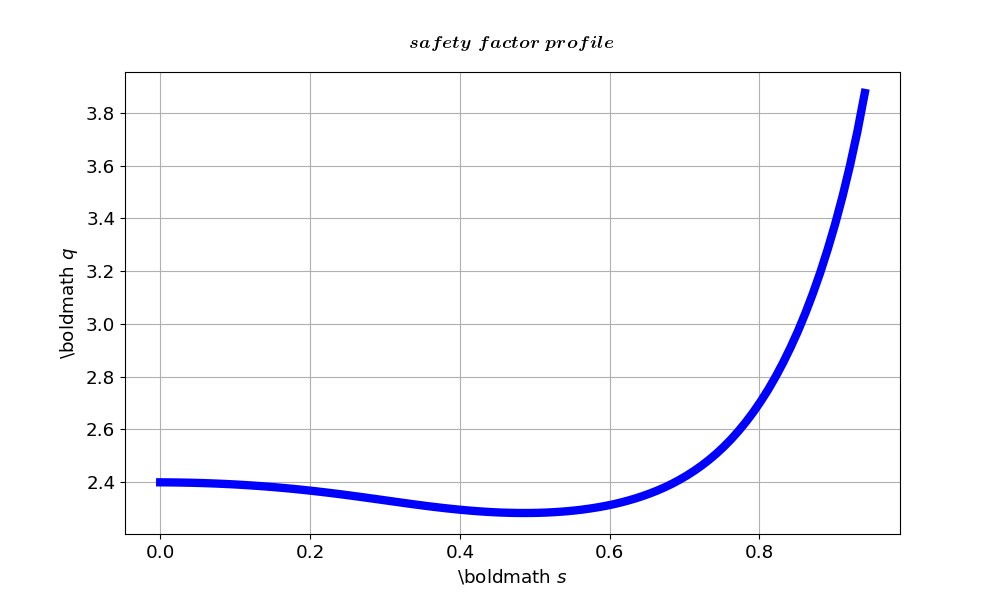

In [8]:
# **********************************
# *** PLOT SAFETY FACTOR PROFILE ***
# **********************************
reload()

oo_equ = {
    'ovars': [
        ['equ-profile', 'q'], 
    ],
    'avrs': [
        ['ts', 'point-t', [0]]
    ],
    'dds': [b025_f001],  # project
    'labx': 's',
    'laby': 'q',
    'tit_plot': 'safety\ factor\ profile',
    'x_end': 0.95,
}
common.plot_vars_1d(oo_equ)

In [ ]:
# ****************************************
# *** PLOT ZONAL RADIAL ELECTRIC FIELD ***
# ****************************************
reload()

oo_filt = None
stys = ['-', '-', '-', '-', '-']
cols = None
x_end = 2.0e5
s1 = 0.5

# --- TIME EVOLUTION AT DIFFERENT RADIAL POINTS ---
tit_plot = 'TIME\ EVOLUTION\ AT\ DIFFERENT\ RADIAL\ POINTS'
s_points = [0.2, 0.5, 0.8]
n_signals = len(s_points)
dds = [b025_f001] * n_signals # projects, where signals will be read from




var_legs = ['s = {:0.1f}'.format(s_one_point) for s_one_point in s_points]
x_end = 5.6e4
stys = ['-', ':']
labx, laby = 't', '\overline{E}_r' + '(s={:0.2f})'.format(s1)
sel_norm = 't-mili-seconds'
ovars = [['zonal', 'erbar']] * len(dds)
avrs = [ ['ts', 'point-s', [s1] ] ] * len(dds)

# --- PLOTTING ---
oo_t_s1 = {
    'ovars': ovars,
    'avrs': avrs,
    'dds': dds,
    'sel_norm': sel_norm,
    'oo_filt': oo_filt,
    'flag_semilogy': True,
    'stys': stys,
    'cols': cols,
    'labx': labx,
    'laby': laby,
    'legs': var_legs,
    'tit_plot':  tit_plot,
    'x_end': x_end,
}
common.plot_vars_1d(oo_t_s1)